# Task 6.3 Practice Geographic Visualization

## Contents:

1. Import libraries and data
2. Data Wrangling
3. Data Cleaning
4. Cloropleth


## 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [63]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [60]:
# Importing json file
country_geo = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/us-states.json'

In [61]:
country_geo

'/Users/jacobyount/Documents/Data Analytics/Immersion 6/us-states.json'

In [6]:
path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6'

In [7]:
df = pd.read_csv(os.path.join(path, 'recipes.csv'))

In [8]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(20052, 680)

## 2. Data Wrangling

In [16]:
# Fixing the dummy columns and selecting the columns needed for analysis.

columns = ['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'alabama',
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]

In [18]:
state_rec = df[columns]

In [19]:
state_rec. head()

,title,rating,calories,protein,fat,sodium,alabama,alaska,arizona,california,...,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Selecting only states
states_num = state_rec[[
"alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [25]:
states_num.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,...,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Turning numerical data into categorical data s2

s2 = states_num.idxmax(axis=1)

In [27]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [28]:
# Creating a new column
state_rec['STATE_NAME'] = s2

/var/folders/76/mj0jm8j14qqbqx0rbfznx25w0000gn/T/ipykernel_20207/1191914183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


In [29]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'alabama',
       'alaska', 'arizona', 'california', 'colorado', 'connecticut', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'nebraska',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'STATE_NAME'],
      dtype='object')

In [33]:
# Dropping the dummy columns in the dataframe

state_rec = state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"])

In [34]:
# capitilizing state names

state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

In [35]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,Alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California


### 3. Cleaning

#### Consistancy Checks

In [36]:
# Check for missing values

state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [37]:
# Impute missing values with median

state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

In [38]:
state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

In [41]:
dups = state_rec.duplicated()

In [43]:
dups.shape

(20052,)

In [44]:
# np duplicates founds

<AxesSubplot:xlabel='fat', ylabel='Count'>

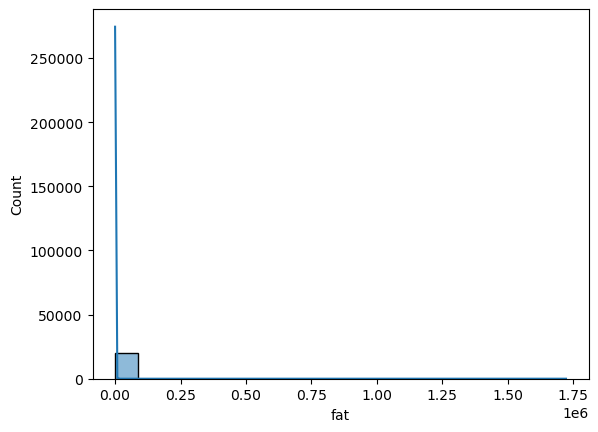

In [45]:
sns.histplot(state_rec['fat'], bins=20, kde = True) # shows extreme values for 'fat'

In [46]:
# Check how many extreme values

state_rec[state_rec['fat'] >1000]

,title,rating,calories,protein,fat,sodium,STATE_NAME
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,Alabama
1837,Bacon-Wrapped Trout Stuffed with Balsamic Onio...,4.375,12010.0,403.0,1115.0,18212.0,Alabama
2976,Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,7540990.0,Alabama
3280,Braised Short Ribs with Red Wine Gravy,3.750,19576.0,723.0,1818.0,2950.0,Alabama
5138,Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,3449373.0,Alabama
6368,Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,27570999.0,Alabama
6645,Braised Orange-Ginger Short Ribs with Dried Ap...,4.375,16050.0,592.0,1480.0,2629.0,Alabama
6912,Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,3449512.0,Alabama
8192,Grilled Lamb Chops with Porcini Mustard,5.000,24117.0,940.0,2228.0,4382.0,Alabama
8873,Grilled Cumin Chicken Breasts with Avocado Salsa,3.750,22312.0,332.0,1007.0,13820.0,Alabama


In [47]:
# Clean extreme values

state_rec = state_rec[state_rec['fat'] < 500] 

In [48]:
# Create a 'cal_per_portion' column

state_rec['cal_per_portion'] = state_rec['calories']*4

/var/folders/76/mj0jm8j14qqbqx0rbfznx25w0000gn/T/ipykernel_20207/573330842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['cal_per_portion'] = state_rec['calories']*4


<AxesSubplot:xlabel='cal_per_portion', ylabel='Count'>

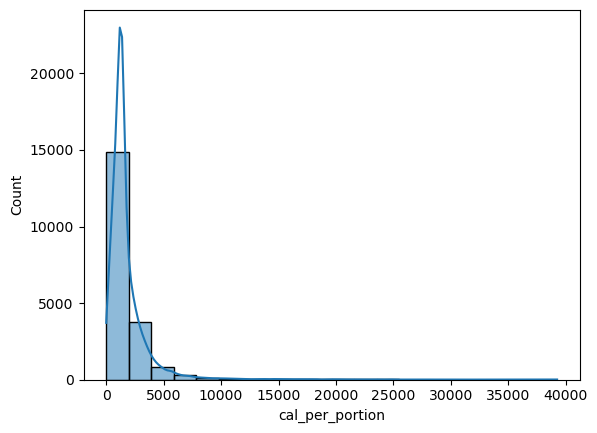

In [49]:
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [50]:
# Clean extreme values in 'cal_per_portion'

state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

<AxesSubplot:xlabel='cal_per_portion', ylabel='Count'>

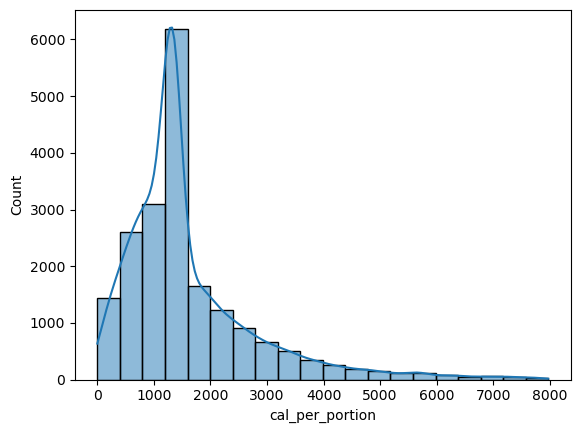

In [51]:
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

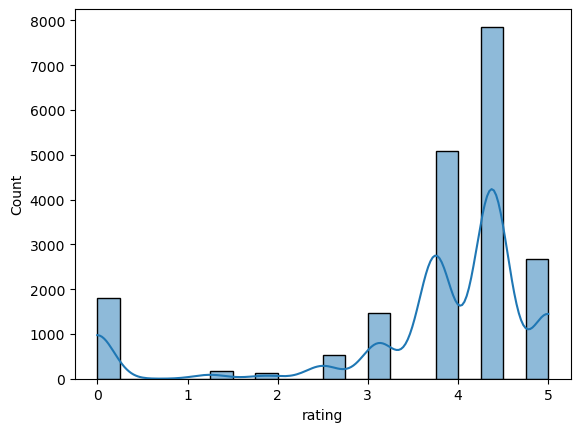

In [52]:
# Check the rating variable

sns.histplot(state_rec['rating'], bins=20, kde = True)

In [53]:
# Select only entries with a non-zero rating

state_rec = state_rec[state_rec['rating'] >= 1]

<AxesSubplot:xlabel='rating', ylabel='Count'>

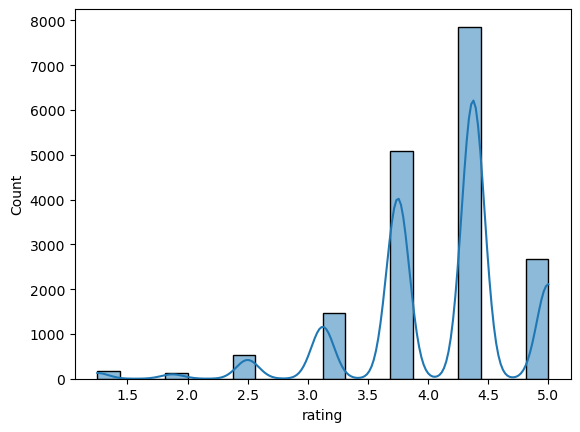

In [54]:
sns.histplot(state_rec['rating'], bins=20, kde = True)

### 4. Plotting cloropleth

In [55]:
data_to_plot = state_rec[['STATE_NAME','rating']]
data_to_plot.head()

,STATE_NAME,rating
0,Alabama,2.500
1,Alabama,4.375
2,New York,3.750
3,Alabama,5.000
4,California,3.125


In [64]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

In [65]:
map